In [1]:
path = '/data/typhon2/Rhys/data/3CR_ALL_Three/'
bdsf_path = '/data/typhon2/Rhys/3CR_ALL_Three/'
PATH_3C401_bdsf_model = bdsf_path+'3C401.pybdsf_gaus_model.fits'
PATH_3C401_bdsf_residual = bdsf_path+'3C401.pybdsf_gaus_resid.fits'
PATH_3C295_bdsf_model = bdsf_path+'3C295.pybdsf_gaus_model.fits'
PATH_3C295_bdsf_residual = bdsf_path+'3C295.pybdsf_gaus_resid.fits'
PATH_3C438_bdsf_model = bdsf_path+'3C438.pybdsf_gaus_model.fits'
PATH_3C438_bdsf_residual = bdsf_path+'3C438.pybdsf_gaus_resid.fits'
PATH_3C452_bdsf_model = bdsf_path+'3C452.pybdsf_gaus_model.fits'
PATH_3C452_bdsf_residual = bdsf_path+'3C452.pybdsf_gaus_resid.fits'
PATH_3C314P1_bdsf_model = bdsf_path+'3C314P1.pybdsf_gaus_model.fits'
PATH_3C314P1_bdsf_residual = bdsf_path+'3C314P1.pybdsf_gaus_resid.fits'
PATH_3C76P1_bdsf_model = bdsf_path+'3C76P1.pybdsf_gaus_model.fits'
PATH_3C76P1_bdsf_residual = bdsf_path+'3C76P1.pybdsf_gaus_resid.fits'
# BDSF gaul model catalogues.
PATH_3C401_bdsf_cat = bdsf_path+'3C401.pybdsf.gaul.fits'
PATH_3C295_bdsf_cat = bdsf_path+'3C295.pybdsf.gaul.fits'
PATH_3C438_bdsf_cat = bdsf_path+'3C438.pybdsf.gaul.fits'
PATH_3C452_bdsf_cat = bdsf_path+'3C452.pybdsf.gaul.fits'
PATH_3C314P1_bdsf_cat = bdsf_path+'3C314P1.pybdsf.gaul.fits'
PATH_3C76P1_bdsf_cat = bdsf_path+'3C76P1.pybdsf.gaul.fits'
# PROFOUND SEGMENTATION IMAGES.
PATH_ProFound_Segimage3C401 = path+'3C401'+'_segimPF.fits'
PATH_ProFound_Segimage3C295 = path+'3C295.fits'+'_segimPF.fits'
PATH_ProFound_Segimage3C438 = path+'3C438'+'_segimPF.fits'
PATH_ProFound_Segimage3C452 = path+'3C452'+'_segimPF.fits'
PATH_ProFound_Segimage3C314P1 = path+'3C314P1'+'_segimPF.fits'
PATH_ProFound_Segimage3C76P1 = path+'3C76P1'+'_segimPF.fits'
# PROFOUND GROUP IMAGES.
PATH_ProFound_Groupimage3C401 = path+'3C401'+'_groupimPF.fits'
PATH_ProFound_Groupimage3C295 = path+'3C295.fits'+'_groupimPF.fits'
PATH_ProFound_Groupimage3C438 = path+'3C381'+'_groupimPF.fits'
PATH_ProFound_Groupimage3C452 = path+'3C452'+'_groupimPF.fits'
PATH_ProFound_Groupimage3C314P1 = path+'3C314P1'+'_groupimPF.fits'
PATH_ProFound_Groupimage3C76P1 = path+'3C314P1'+'_groupimPF.fits'



import numpy as np
from DRUID import sf
import matplotlib.pyplot as plt
from matplotlib import colors
from astropy.io import fits
from matplotlib.path import Path
from astropy.table import Table
import skimage.measure as measure
from astropy.stats import mad_std

custom_colors = ['red', 'green', 'blue', 'orange', 'purple']

# Set the custom color cycle
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=custom_colors)

def create_contour_mask(contours, width, height):
    mask = np.zeros((height, width), dtype=np.uint8)
    
    if isinstance(contours, np.ndarray):
        contours = [contours]
    
    for contour in contours:
        contour = contour[:, [1, 0]]  # Swap x and y for compatibility
        
        path = Path(contour)
        
        x, y = np.meshgrid(np.arange(width), np.arange(height))
        points = np.column_stack((x.ravel(), y.ravel()))
        
        inside = path.contains_points(points)
        inside = inside.reshape((height, width))
        mask[inside] = 1
        
    return mask

def DRUID_3CRXX(image_PATH,index_list):
    # open the image
    image = fits.open(image_PATH)[0]
    # crop the image to 2d 
    image = image.data[0,0,:,:]
    # run DRUID
    findmysources = sf(image=image, image_path=None, mode='Radio',        
                        pb_path = None, cutup = False, cutup_size = None, 
                        cutup_buff=None,output = False,
                        area_limit=15,smooth_sigma=1,
                        nproc=1,GPU=True, header=None,Xoff=None,Yoff=None)
    findmysources.set_background(detection_threshold=5,
                                analysis_threshold=2,
                                mode='Radio')
    findmysources.phsf(lifetime_limit_fraction=1.5)
    #findmysources.source_characterising()
    findmysources.create_polygons()
    findmysources.plot_sources(cmap="gray",figsize=(5,5),norm=None)
    polygons = findmysources.polygons
    
    contours = []
    for i in index_list:
        contours.append(polygons[i])

    source_mask = create_contour_mask(contours, image.shape[1], image.shape[0])
    resid = image.copy()
    resid[source_mask == 1] = 0 + np.random.normal(0,mad_std(image)/2,image[source_mask==1].shape)

    return polygons,resid,source_mask
    

   
              
              
#############################################

_______   _______          _________ ______  
(  __  \ (  ____ )|\     /|\__   __/(  __  \ 
| (  \  )| (    )|| )   ( |   ) (   | (  \  )
| |   ) || (____)|| |   | |   | |   | |   ) |
| |   | ||     __)| |   | |   | |   | |   | |
| |   ) || (\ (   | |   | |   | |   | |   ) |
| (__/  )| ) \ \__| (___) |___) (___| (__/  )
(______/ |/   \__/(_______)\_______/(______/ 
        
        
#############################################

Detector of astRonomical soUrces in optIcal and raDio images

Version: v1.0

For more information see:
https://github.com/RhysAlfShaw/DRUID
        
Found 1 GPUs
GPUs are avalible, GPU functions will now be avalible.
Image smoothed with sigma = 1
Setting background..
Not creating a background map.
Background set to:  0.00014963278984642591
Background mean set to:  2.6539994e-05
Time to compute PH: 0.020693302154541016
Calculating area with GPU...


/home/rs17612/GitHub/DRUID/DRUID/src/homology/homology_new.py:212: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pd = pd.append(new_row,ignore_index=True)
/home/rs17612/GitHub/DRUID/DRUID/src/homology/homology_new.py:212: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pd = pd.append(new_row,ignore_index=True)


Time to calculate area and inital bbox: 0.12297821044921875
enclosed_i calculated! t=0.015012741088867188 s
5
Time to correct first destruction:  0.007321596145629883
Assigning parent tags..
Time to assign parent tags:  0.0011594295501708984
Classifying sources in hirearchy..
Time to classify sources:  0.0007243156433105469
      Birth     Death     x1     y1     x2     y2  lifetime        bg  \
0  0.045167  0.000299   75.0  155.0    0.0    0.0  0.044868  0.000748   
1  0.014193  0.000769  213.0  103.0  123.0  131.0  0.013423  0.000748   
2  0.014032  0.002599  129.0  128.0  132.0  124.0  0.011433  0.000748   
3  0.010900  0.006100   25.0  189.0   47.0  183.0  0.004800  0.000748   
4  0.001302  0.000849   91.0   60.0   96.0   68.0  0.000453  0.000748   
5  0.045167  0.000769   75.0  155.0    0.0    0.0  0.044868  0.000748   
6  0.014193  0.002599  213.0  103.0  123.0  131.0  0.013423  0.000748   

   edge_flag   mean_bg  ...  bbox1  bbox2  bbox3 bbox4 Y0_cutout X0_cutout  \
0      Fals

Creating polygons: 100%|██████████| 7/7 [00:00<00:00, 596.90it/s]


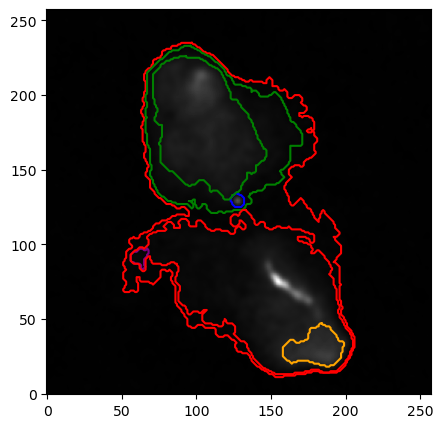

/home/rs17612/GitHub/DRUID/DRUID/src/homology/homology_new.py:212: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pd = pd.append(new_row,ignore_index=True)


   
              
              
#############################################

_______   _______          _________ ______  
(  __  \ (  ____ )|\     /|\__   __/(  __  \ 
| (  \  )| (    )|| )   ( |   ) (   | (  \  )
| |   ) || (____)|| |   | |   | |   | |   ) |
| |   | ||     __)| |   | |   | |   | |   | |
| |   ) || (\ (   | |   | |   | |   | |   ) |
| (__/  )| ) \ \__| (___) |___) (___| (__/  )
(______/ |/   \__/(_______)\_______/(______/ 
        
        
#############################################

Detector of astRonomical soUrces in optIcal and raDio images

Version: v1.0

For more information see:
https://github.com/RhysAlfShaw/DRUID
        
Found 1 GPUs
GPUs are avalible, GPU functions will now be avalible.
Image smoothed with sigma = 1
Setting background..
Not creating a background map.
Background set to:  4.0891969738098496e-05
Background mean set to:  -1.8992012e-06
Time to compute PH: 0.01974177360534668
Calculating area with GPU...
Time to calculate area and inital b

Creating polygons: 100%|██████████| 4/4 [00:00<00:00, 692.19it/s]


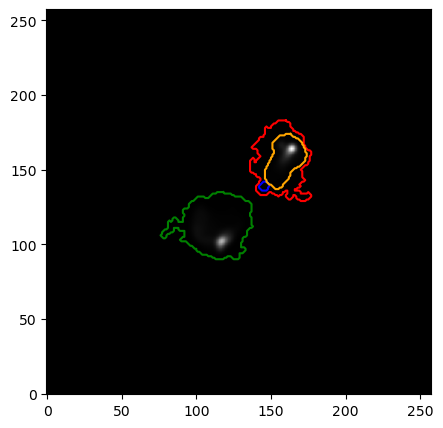

/home/rs17612/GitHub/DRUID/DRUID/src/homology/homology_new.py:212: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pd = pd.append(new_row,ignore_index=True)
/home/rs17612/GitHub/DRUID/DRUID/src/homology/homology_new.py:212: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pd = pd.append(new_row,ignore_index=True)


   
              
              
#############################################

_______   _______          _________ ______  
(  __  \ (  ____ )|\     /|\__   __/(  __  \ 
| (  \  )| (    )|| )   ( |   ) (   | (  \  )
| |   ) || (____)|| |   | |   | |   | |   ) |
| |   | ||     __)| |   | |   | |   | |   | |
| |   ) || (\ (   | |   | |   | |   | |   ) |
| (__/  )| ) \ \__| (___) |___) (___| (__/  )
(______/ |/   \__/(_______)\_______/(______/ 
        
        
#############################################

Detector of astRonomical soUrces in optIcal and raDio images

Version: v1.0

For more information see:
https://github.com/RhysAlfShaw/DRUID
        
Found 1 GPUs
GPUs are avalible, GPU functions will now be avalible.
Image smoothed with sigma = 1
Setting background..
Not creating a background map.
Background set to:  0.000107599402419028
Background mean set to:  1.8281646e-05
Time to compute PH: 0.019160985946655273
Calculating area with GPU...
Time to calculate area and inital bbo

Creating polygons: 100%|██████████| 10/10 [00:00<00:00, 699.32it/s]


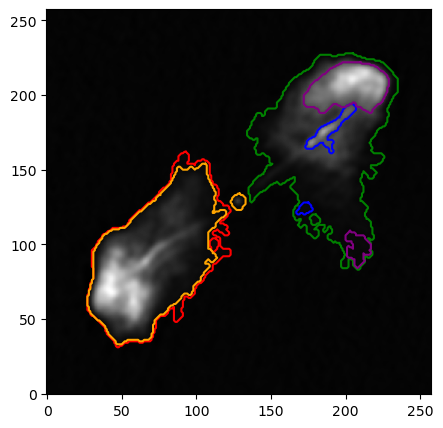

/home/rs17612/GitHub/DRUID/DRUID/src/homology/homology_new.py:212: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pd = pd.append(new_row,ignore_index=True)


   
              
              
#############################################

_______   _______          _________ ______  
(  __  \ (  ____ )|\     /|\__   __/(  __  \ 
| (  \  )| (    )|| )   ( |   ) (   | (  \  )
| |   ) || (____)|| |   | |   | |   | |   ) |
| |   | ||     __)| |   | |   | |   | |   | |
| |   ) || (\ (   | |   | |   | |   | |   ) |
| (__/  )| ) \ \__| (___) |___) (___| (__/  )
(______/ |/   \__/(_______)\_______/(______/ 
        
        
#############################################

Detector of astRonomical soUrces in optIcal and raDio images

Version: v1.0

For more information see:
https://github.com/RhysAlfShaw/DRUID
        
Found 1 GPUs
GPUs are avalible, GPU functions will now be avalible.
Image smoothed with sigma = 1
Setting background..
Not creating a background map.
Background set to:  0.0002749625626767066
Background mean set to:  0.00014154088
Time to compute PH: 0.026363611221313477
Calculating area with GPU...
Time to calculate area and inital bb

Creating polygons: 100%|██████████| 4/4 [00:00<00:00, 518.30it/s]


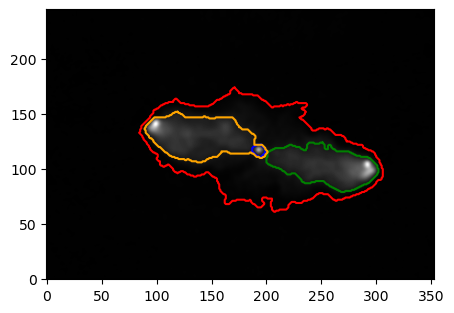

/home/rs17612/GitHub/DRUID/DRUID/src/homology/homology_new.py:212: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pd = pd.append(new_row,ignore_index=True)
/home/rs17612/GitHub/DRUID/DRUID/src/homology/homology_new.py:212: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pd = pd.append(new_row,ignore_index=True)


   
              
              
#############################################

_______   _______          _________ ______  
(  __  \ (  ____ )|\     /|\__   __/(  __  \ 
| (  \  )| (    )|| )   ( |   ) (   | (  \  )
| |   ) || (____)|| |   | |   | |   | |   ) |
| |   | ||     __)| |   | |   | |   | |   | |
| |   ) || (\ (   | |   | |   | |   | |   ) |
| (__/  )| ) \ \__| (___) |___) (___| (__/  )
(______/ |/   \__/(_______)\_______/(______/ 
        
        
#############################################

Detector of astRonomical soUrces in optIcal and raDio images

Version: v1.0

For more information see:
https://github.com/RhysAlfShaw/DRUID
        
Found 1 GPUs
GPUs are avalible, GPU functions will now be avalible.
Image smoothed with sigma = 1
Setting background..
Not creating a background map.
Background set to:  7.263653020263521e-05
Background mean set to:  2.5636105e-05
Time to compute PH: 0.019548654556274414
Calculating area with GPU...
Time to calculate area and inital bb

Creating polygons: 100%|██████████| 6/6 [00:00<00:00, 734.04it/s]


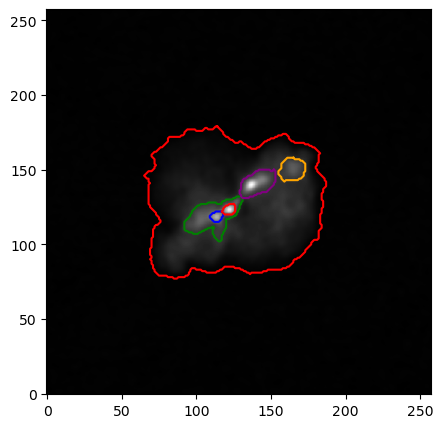

[array([[235.,  97.],
       [235.,  96.],
       [235.,  95.],
       ...,
       [234.,  99.],
       [234.,  98.],
       [235.,  97.]]), array([[233.,  96.],
       [233.,  95.],
       [233.,  94.],
       [233.,  93.],
       [233.,  92.],
       [232.,  91.],
       [232.,  90.],
       [231.,  89.],
       [230.,  88.],
       [230.,  87.],
       [230.,  86.],
       [230.,  85.],
       [230.,  84.],
       [229.,  83.],
       [229.,  82.],
       [228.,  81.],
       [227.,  80.],
       [226.,  79.],
       [225.,  78.],
       [224.,  77.],
       [224.,  76.],
       [223.,  75.],
       [222.,  74.],
       [221.,  73.],
       [220.,  72.],
       [219.,  71.],
       [218.,  70.],
       [217.,  69.],
       [216.,  68.],
       [215.,  67.],
       [214.,  67.],
       [213.,  67.],
       [212.,  67.],
       [211.,  67.],
       [210.,  67.],
       [209.,  67.],
       [208.,  67.],
       [207.,  67.],
       [206.,  67.],
       [205.,  67.],
       [204.,  67.]

In [2]:
DRUID_3C401_polygons,DRUID_3C401_resid,DRUID_3C401_source_mask = DRUID_3CRXX(path+'3C401',[0,1,2,3])
DRUID_3C295_polygons,DRUID_3C295_resid,DRUID_3C295_source_mask = DRUID_3CRXX(path+'3C295.fits',[0,1,2,3])
DRUID_3C438_polygons,DRUID_3C438_resid,DRUID_3C438_source_mask = DRUID_3CRXX(path+'3C438',[0,1,2,3,4,5,6,7,8,9])
DRUID_3C452_polygons,DRUID_3C452_resid,DRUID_3C452_source_mask = DRUID_3CRXX(path+'3C452',[0,1,2,3])
DRUID_3C76P1_polygons,DRUID_3C76P1_resid,DRUID_3C76P1_source_mask = DRUID_3CRXX(path+'3C76P1',[0,1,2,3])
print(DRUID_3C401_polygons)

In [3]:
def bdsf_plots(model_Path,resid_path,image_path):
    # gets the pybdsf model, residual and image.
    hdulist = fits.open(model_Path)
    model = hdulist[0].data[0,0,:,:]
    hdulist = fits.open(resid_path)
    resid = hdulist[0].data[0,0,:,:]
    hdulist = fits.open(image_path)
    image = hdulist[0].data[0,0,:,:]
    return model,resid,image

def bdsf_cat_plots(cat_path):
    # open the bdsf catalogue with astropy tables
    cat = Table.read(cat_path).to_pandas()   
    # reduce to the columns we want
    cat = cat[['Xposn','Yposn','Maj','Min','PA']] 
    return cat

BDSF_model_3C401, BDSF_resid_3C401, Image_3C401 = bdsf_plots(PATH_3C401_bdsf_model,PATH_3C401_bdsf_residual,path+'3C401')
BDSF_model_3C295, BDSF_resid_3C295, Image_3C295 = bdsf_plots(PATH_3C295_bdsf_model,PATH_3C295_bdsf_residual,path+'3C295.fits')
BDSF_model_3C438, BDSF_resid_3C438, Image_3C438 = bdsf_plots(PATH_3C438_bdsf_model,PATH_3C438_bdsf_residual,path+'3C438')
BDSF_model_3C452, BDSF_resid_3C452, Image_3C452 = bdsf_plots(PATH_3C452_bdsf_model,PATH_3C452_bdsf_residual,path+'3C452')
BDSF_model_3C76P1, BDSF_resid_3C76P1, Image_3C76P1 = bdsf_plots(PATH_3C76P1_bdsf_model,PATH_3C76P1_bdsf_residual,path+'3C76P1')

In [4]:
BDSF_Gaul_cat_3C401 = bdsf_cat_plots(PATH_3C401_bdsf_cat)
BDSF_Gaul_cat_3C295 = bdsf_cat_plots(PATH_3C295_bdsf_cat)
BDSF_Gaul_cat_3C438 = bdsf_cat_plots(PATH_3C438_bdsf_cat)
BDSF_Gaul_cat_3C452 = bdsf_cat_plots(PATH_3C452_bdsf_cat)
BDSF_Gaul_cat_3C76P1 = bdsf_cat_plots(PATH_3C76P1_bdsf_cat)

print(BDSF_Gaul_cat_3C401.columns)

Index(['Xposn', 'Yposn', 'Maj', 'Min', 'PA'], dtype='object')


In [5]:
# use astropy to convert maj and min from arcsec to pixels using the header
import astropy.units as u
from astropy.wcs import WCS
import astropy.io.fits as fits
from astropy.coordinates import SkyCoord

def convert_arcsec_to_pixels(maj,min,header):
    wcs = WCS(header)
    # convert the major and minor axis from arcsec to pixels
    maj_pix = (maj*u.deg).value / wcs.wcs.cdelt[0]
    min_pix = (min*u.deg).value / wcs.wcs.cdelt[1]
    return maj_pix,min_pix

header_3C401 = fits.getheader(path+'3C401')
header_3C295 = fits.getheader(path+'3C295.fits')
header_3C438 = fits.getheader(path+'3C438')
header_3C452 = fits.getheader(path+'3C452')
header_3C76P1 = fits.getheader(path+'3C76P1')


In [6]:
from matplotlib.patches import Ellipse

def plot_bdsf_gaussians(BDSF_Gaul_cat,header,image,ax,Vmin=0,Vmax=0.1):
    ax.imshow(image,cmap='gray',vmin=Vmin,vmax=Vmax,origin='lower')
    # plot the bdsf gaussians
    # plot the ellipse
    #print(BDSF_Gaul_cat)
    for i in range(len(BDSF_Gaul_cat)):
        maj_pix,min_pix = convert_arcsec_to_pixels(BDSF_Gaul_cat['Maj'][i],BDSF_Gaul_cat['Min'][i],header)
        
        PA = BDSF_Gaul_cat['PA'][i]
        X = BDSF_Gaul_cat['Xposn'][i]
        Y = BDSF_Gaul_cat['Yposn'][i]
        e = Ellipse(xy=(X,Y),
                    width=maj_pix,height=min_pix,angle=PA-90,fill=False,color='red',linewidth=1,linestyle='--')
        ax.add_artist(e)
    return ax

In [7]:
# run DRUID on the 3CR sources.
import pandas as pd
def get_profound_polygons(PATH,Image,index_list,source_id):
    Profound_mask = fits.open(PATH)[0].data
    PF_coutours = []
    list_val = np.unique(Profound_mask)

    for i in range(0, len(list_val)):
        # get the image for where value = i
        val = list_val[i]
        img_temp = Profound_mask.copy()
        img_temp[img_temp != val] = 0
        
        if img_temp.sum() == 0:
            continue
        else:
            contour = measure.find_contours(img_temp, 0.8)[0]
            contour[:,0] = contour[:,0] 
            contour[:,1] = contour[:,1] 
            PF_coutours.append(contour)
            #print(PF_coutours)
    # remove contours that are not the source.
    
    PF_coutours_reduced = []
    for i in index_list:
        PF_coutours_reduced.append(PF_coutours[i])
    source_mask = create_contour_mask(PF_coutours_reduced, Profound_mask.shape[1], Profound_mask.shape[0])
    resid = Image.copy()
    Cat_path = '/data/typhon2/Rhys/data/3CR_ALL_Three/'+source_id+'_groupstatsPF.txt'
    Noise = np.nanmean(pd.read_csv(Cat_path,sep='\s+')['skyRMS_mean'])
    resid[source_mask == 1] = 0 + np.random.normal(0,Noise,Image[source_mask==1].shape)

    return Profound_mask, PF_coutours, resid, source_mask

Profound_mask_3C401, Profound_contours_3C401, Profound_resid_3C401, Profound_source_mask_3C401 = get_profound_polygons(PATH_ProFound_Segimage3C401,Image_3C401,[0,1,2,3],'3C401')
Profound_mask_3C295, Profound_contours_3C295, Profound_resid_3C295, Profound_source_mask_3C295 = get_profound_polygons(PATH_ProFound_Segimage3C295,Image_3C295,[0,1,2],'3C295.fits')
Profound_mask_3C438, Profound_contours_3C438, Profound_resid_3C438, Profound_source_mask_3C438 = get_profound_polygons(PATH_ProFound_Segimage3C438,Image_3C438,[0,1,2,3,4,5,6,7,8,9,10],'3C438')
Profound_mask_3C452, Profound_contours_3C452, Profound_resid_3C452, Profound_source_mask_3C452 = get_profound_polygons(PATH_ProFound_Segimage3C452,Image_3C452,[0,1,2],'3C452')
Profound_mask_3C76P1, Profound_contours_3C76P1, Profound_resid_3C76P1, Profound_source_mask_3C76P1 = get_profound_polygons(PATH_ProFound_Segimage3C76P1,Image_3C76P1,[0,1,2],'3C76P1')

In [8]:
# open a group catalogue and look at what the noise is from the catalogue

Path =  '/data/typhon2/Rhys/data/3CR_ALL_Three/'+'3C401'+'_groupstatsPF.txt'
# open catalogue with pandas
import pandas as pd
cat = pd.read_csv(Path,sep='\s+')
cat

,groupID,uniqueID,xcen,ycen,xmax,ymax,RAcen,Deccen,RAmax,Decmax,...,sky_sum,skyRMS_mean,Nedge,Nsky,Nobject,Nborder,Nmask,edge_frac,edge_excess,flag_border
1,1,155075,132.404800,116.600483,154.5,74.5,NaN,NaN,NaN,NaN,...,-1.034806,0.000076,707,547,160,0,0,0.773692,0.998489,0
2,133,169124,169.279391,124.618798,168.5,123.5,NaN,NaN,NaN,NaN,...,-0.016009,0.000076,68,29,39,0,0,0.426471,0.927716,0
3,138,169158,169.913593,156.472637,168.5,157.5,NaN,NaN,NaN,NaN,...,-0.004297,0.000076,40,14,26,0,0,0.350000,1.048799,0
4,139,185101,186.333938,101.852882,184.5,100.5,NaN,NaN,NaN,NaN,...,-0.002954,0.000076,35,3,32,0,0,0.085714,0.977671,0
5,141,147203,145.960581,205.978987,146.5,202.5,NaN,NaN,NaN,NaN,...,-0.003636,0.000076,39,14,25,0,0,0.358974,1.117657,0
6,144,57072,55.258504,68.996845,56.5,71.5,NaN,NaN,NaN,NaN,...,-0.013064,0.000080,68,39,29,0,0,0.573529,0.971437,0
7,146,192100,193.800441,98.402170,191.5,99.5,NaN,NaN,NaN,NaN,...,-0.003865,0.000076,42,20,22,0,0,0.476190,0.963826,0


Changed DATE-OBS from '05/05/93' to '1993-05-05''. [astropy.wcs.wcs]
Changed DATE-OBS from '12/11/93' to '1993-11-12''. [astropy.wcs.wcs]
Changed DATE-OBS from '25/11/88' to '1988-11-25''. [astropy.wcs.wcs]
Changed DATE-OBS from '19/08/82' to '1982-08-19''. [astropy.wcs.wcs]
Changed DATE-OBS from '25/11/87' to '1987-11-25''. [astropy.wcs.wcs]


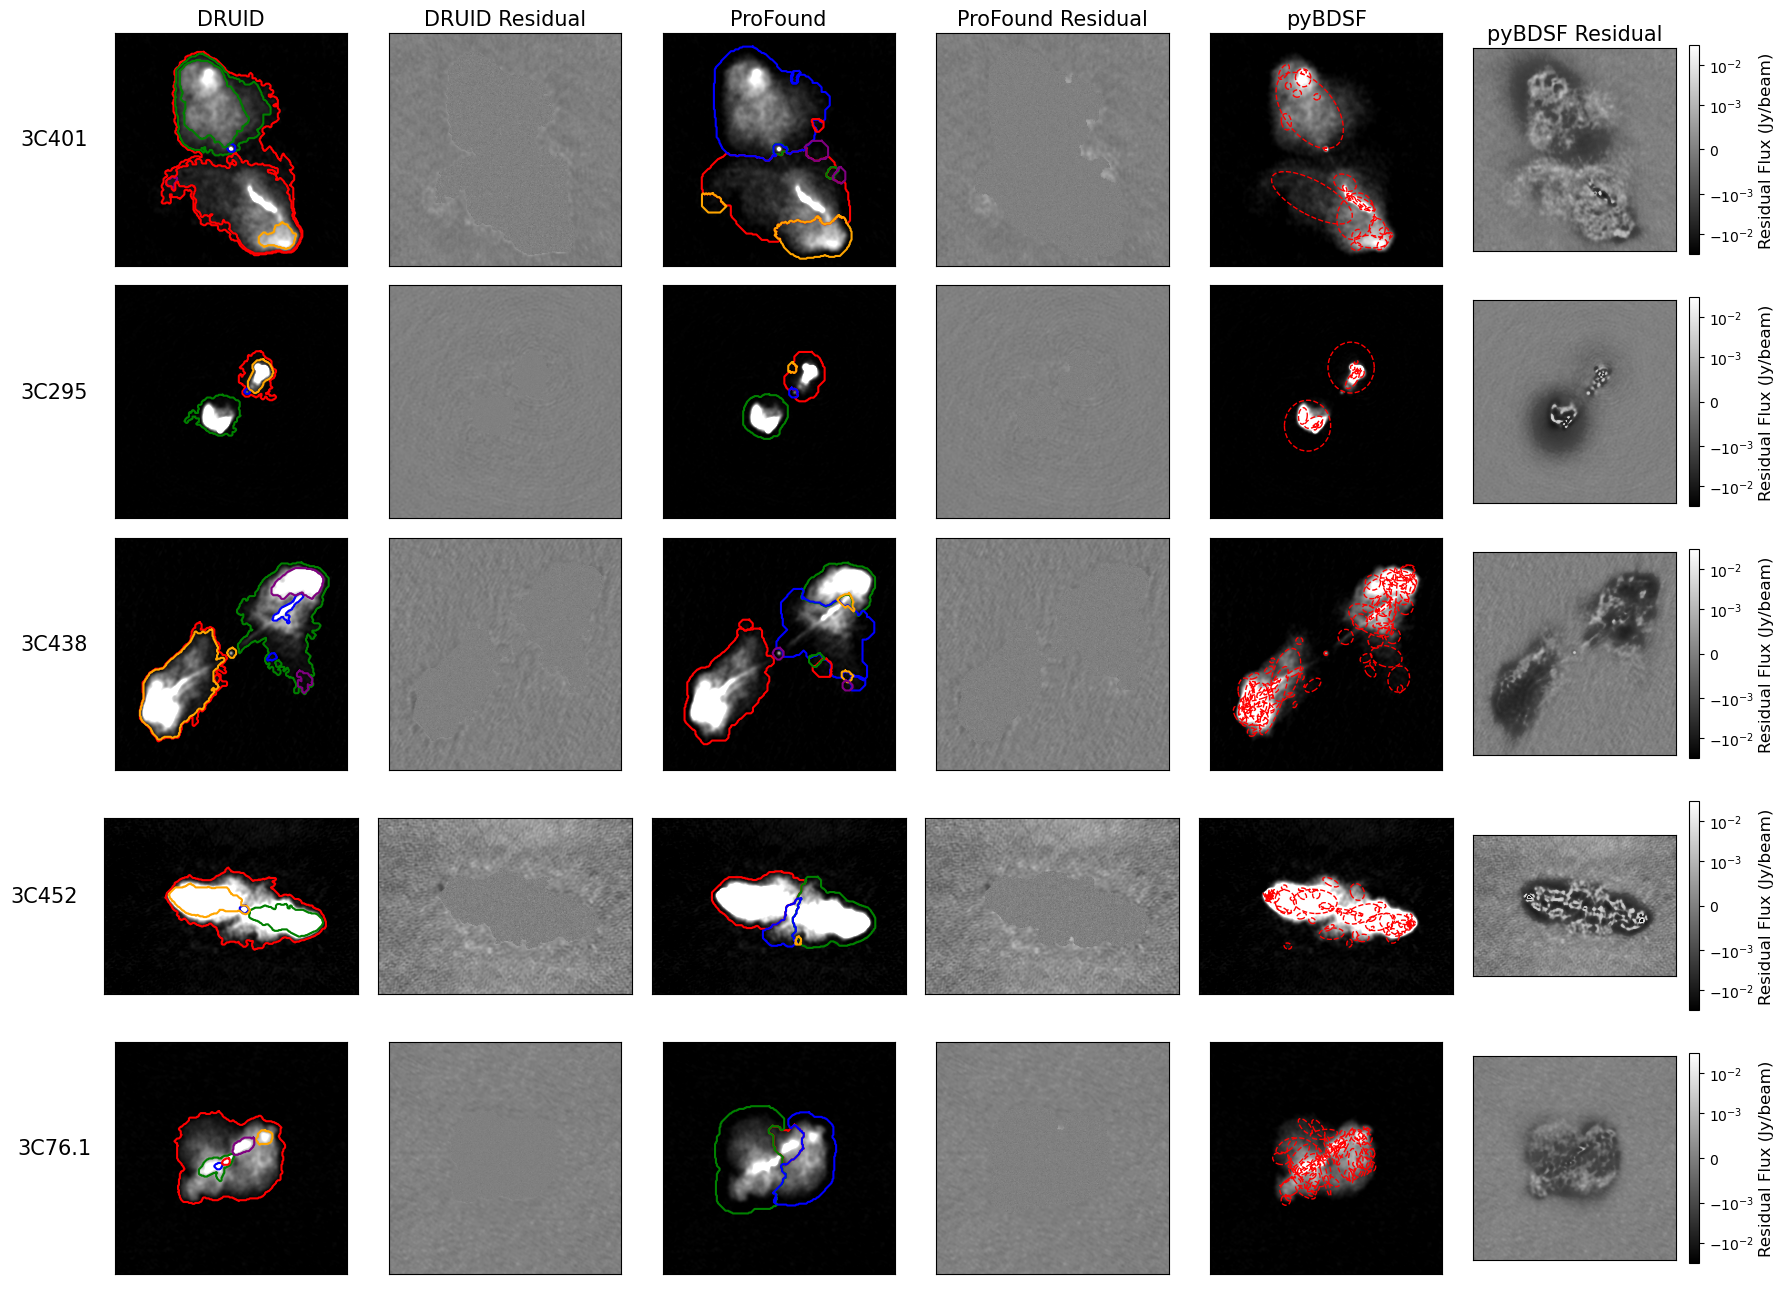

In [9]:
# plot the DRUID and Profound contours on two images for comparison.
from matplotlib import colors

fig, ax = plt.subplots(5,6,figsize=(18,13))
fontS = 15

Vmax_resid = 0.005
vmax = 0.01
vmin = 0

def source_plot(image,Druid_poly,ProF_contours,BDSF_model,BDSF_resid,DRUID_resid,PF_resid,header,BDSF_Gaul_cat,axn,Vmin,Vmax,Vmax_resid ):
        
    ax[axn,0].imshow(image, cmap='gray', origin='lower',vmax=Vmax,vmin=Vmin)
    for i in range(0, len(Druid_poly)):
        ax[axn,0].plot(Druid_poly[i][:,1], Druid_poly[i][:,0],linewidth=1.5)
    ax[axn,1].imshow(DRUID_resid, origin='lower', cmap='gray',norm=colors.SymLogNorm(linthresh=0.001, vmin=-Vmax_resid, vmax=Vmax_resid))
    ax[axn,2].imshow(image, cmap='gray', origin='lower',vmax=Vmax,vmin=Vmin)
    
    for i in range(0, len(ProF_contours)):
        ax[axn,2].plot(ProF_contours[i][:,1], ProF_contours[i][:,0])
    ax[axn,3].imshow(PF_resid, origin='lower', cmap='gray',norm=colors.SymLogNorm(linthresh=0.001, vmin=-Vmax_resid, vmax=Vmax_resid))
    #ax[axn,4].imshow(BDSF_model, cmap='gray', origin='lower',vmax=Vmax,vmin=Vmin)
    ax[axn,4] = plot_bdsf_gaussians(header,BDSF_Gaul_cat,image,ax[axn,4],Vmin=Vmin,Vmax=Vmax)
    ax[axn,5].imshow(BDSF_resid, origin='lower', cmap='gray',norm=colors.SymLogNorm(linthresh=0.001, vmin=-Vmax_resid, vmax=Vmax_resid))
    # plot color bar for the residual images.
    cbar = fig.colorbar(ax[axn,5].imshow(BDSF_resid, origin='lower', cmap='gray',norm=colors.SymLogNorm(linthresh=0.001, vmin=-Vmax_resid, vmax=Vmax_resid)), 
                        ax=ax[axn,5],shrink=0.9)
    cbar.set_label('Residual Flux (Jy/beam)', fontsize=12)
#vmin = np.min([np.min(BDSF_resid_3C295),np.min(BDSF_resid_3C401),np.min(BDSF_resid_3C438),np.min(BDSF_resid_3C452),np.min(BDSF_resid_3C76P1)])*2 
Vmax_resid = np.max([np.max(BDSF_resid_3C295),np.max(BDSF_resid_3C401),np.max(BDSF_resid_3C438),np.max(BDSF_resid_3C452),np.max(BDSF_resid_3C76P1)])
source_plot(Image_3C401,DRUID_3C401_polygons,Profound_contours_3C401,BDSF_model_3C401,BDSF_resid_3C401,DRUID_3C401_resid,Profound_resid_3C401,BDSF_Gaul_cat_3C401,header_3C401,0,vmin,vmax, Vmax_resid)
source_plot(Image_3C438,DRUID_3C438_polygons,Profound_contours_3C438,BDSF_model_3C438,BDSF_resid_3C438,DRUID_3C438_resid,Profound_resid_3C438,BDSF_Gaul_cat_3C438,header_3C438,2,vmin,vmax, Vmax_resid)
source_plot(Image_3C295,DRUID_3C295_polygons,Profound_contours_3C295,BDSF_model_3C295,BDSF_resid_3C295,DRUID_3C295_resid,Profound_resid_3C295,BDSF_Gaul_cat_3C295,header_3C295,1,vmin,vmax, Vmax_resid)
source_plot(Image_3C452,DRUID_3C452_polygons,Profound_contours_3C452,BDSF_model_3C452,BDSF_resid_3C452,DRUID_3C452_resid,Profound_resid_3C452,BDSF_Gaul_cat_3C452,header_3C452,3,vmin,vmax, Vmax_resid)
source_plot(Image_3C76P1,DRUID_3C76P1_polygons,Profound_contours_3C76P1,BDSF_model_3C76P1,BDSF_resid_3C76P1,DRUID_3C76P1_resid,Profound_resid_3C76P1,BDSF_Gaul_cat_3C76P1,header_3C76P1,4,vmin,vmax, Vmax_resid)

ax[0,0].set_title('DRUID',fontsize=fontS)
ax[0,1].set_title('DRUID Residual',fontsize=fontS)
ax[0,2].set_title('ProFound',fontsize=fontS)
ax[0,3].set_title('ProFound Residual',fontsize=fontS)
ax[0,4].set_title('pyBDSF',fontsize=fontS)
ax[0,5].set_title('pyBDSF Residual',fontsize=fontS)

ax[0,0].set_ylabel('3C401',rotation=0,labelpad=40,fontsize=fontS)
ax[1,0].set_ylabel('3C295',rotation=0,labelpad=40,fontsize=fontS)
ax[2,0].set_ylabel('3C438',rotation=0,labelpad=40,fontsize=fontS)
ax[3,0].set_ylabel('3C452',rotation=0,labelpad=40,fontsize=fontS)
ax[4,0].set_ylabel('3C76.1',rotation=0,labelpad=40,fontsize=fontS)

# remove all the axis labels.
for i in range(0,5):
    for j in range(0,6):
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
plt.tight_layout()
plt.savefig('figures/DRUID_ProFound_BDSF_Mosaic.svg')
plt.show()

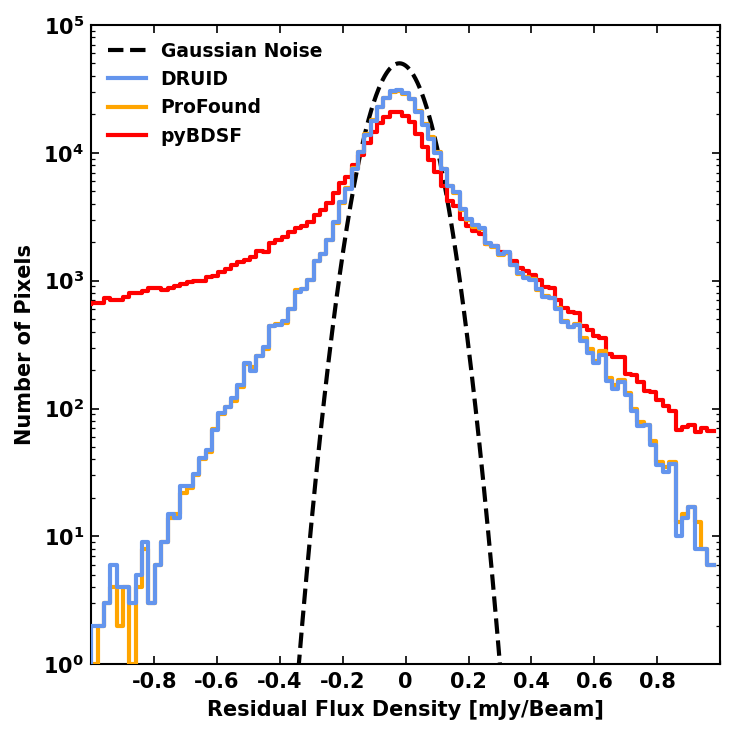

In [28]:
def gaussian(x, amp, cen, wid):
    return amp * np.exp(-(x-cen)**2 / wid)


x = np.linspace(-0.0004,0.0004, 500)

amp = 5*10**4                                               # amplitude infered from model noise histogram below.
sigma = np.std(DRUID_3C401_resid.flatten())*0.1E-3
noise = gaussian(x, amp, 0 - 0.00002, sigma)

N = Image_3C401.shape[0]*Image_3C401.shape[1] + Image_3C295.shape[0]*Image_3C295.shape[1] + Image_3C438.shape[0]*Image_3C438.shape[1] + Image_3C452.shape[0]*Image_3C452.shape[1] + Image_3C76P1.shape[0]*Image_3C76P1.shape[1]

bins = np.linspace(-1E-3,1E-3,100)
Profound_resid_combined = np.hstack([Profound_resid_3C401.flatten(),Profound_resid_3C295.flatten(),Profound_resid_3C438.flatten(),Profound_resid_3C452.flatten(),Profound_resid_3C76P1.flatten()])
DRUID_resid_combined = np.hstack([DRUID_3C401_resid.flatten(),DRUID_3C295_resid.flatten(),DRUID_3C438_resid.flatten(),DRUID_3C452_resid.flatten(),DRUID_3C76P1_resid.flatten()])
BDSF_resid_combined = np.hstack([BDSF_resid_3C401.flatten(),BDSF_resid_3C295.flatten(),BDSF_resid_3C438.flatten(),BDSF_resid_3C452.flatten(),BDSF_resid_3C76P1.flatten()])

DRUID_hist, DRUID_bins = np.histogram(DRUID_resid_combined,bins=bins)
Profound_hist, Profound_bins = np.histogram(Profound_resid_combined,bins=bins)
BDSF_hist, BDSF_bins = np.histogram(BDSF_resid_combined,bins=bins)
plt.style.use('/home/rs17612/GitHub/mplrc_sotiria.mplstyle')
 
plt.figure(figsize=(5,5))

plt.plot(x,noise,label='Gaussian Noise',color='black',linestyle='--',marker='',zorder=1)
plt.step(DRUID_bins[:-1],DRUID_hist,label='DRUID',marker='',zorder=10,color='cornflowerblue')
plt.step(Profound_bins[:-1],Profound_hist,label='ProFound',marker='',zorder=5,color='orange')
plt.step(BDSF_bins[:-1],BDSF_hist,label='pyBDSF',marker='',zorder=3,color='red')
plt.legend(loc='upper left',fontsize=9)
plt.xlabel('Residual Flux Density [mJy/Beam]')
plt.ylabel('Number of Pixels')
plt.yscale('log')
plt.xscale('symlog')
plt.ylim(1,1E5)
plt.xlim(-1E-3,1E-3)
plt.xticks([-0.8E-3,-0.6E-3,-0.4E-3,-0.2E-3,0,0.2E-3,0.4E-3,0.6E-3,0.8E-3],['-0.8','-0.6','-0.4','-0.2','0','0.2','0.4','0.6','0.8'])
plt.savefig('figures/Residuals_Histogram.svg')
plt.show()